<a href="https://colab.research.google.com/github/GubioGL/Optics/blob/main/Mult_Modos_posi%C3%A7%C3%A3o_diferente_3_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade LightPipes
from LightPipes import *
from matplotlib import image
from scipy.fft import fft2, ifft2 ,fftshift
from scipy import special
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random
import PIL
from PIL import Image

     |████████████████████████████████| 50 kB 4.1 MB/s 


In [ ]:
# Pedidno permissão para ter acesso ao drive
from google.colab import drive
drive.mount('/content/drive', True)
SLM  = Image.open('/content/drive/MyDrive/Colab Notebooks/Gubio/DD.png')
# Criando a Fenda 
imgGray = SLM.convert('L')
imgGray.save('imgGray2.jpg')
imgGra  = plt.imread('imgGray2.jpg')
ri = imgGra/imgGra.max()

Mounted at /content/drive


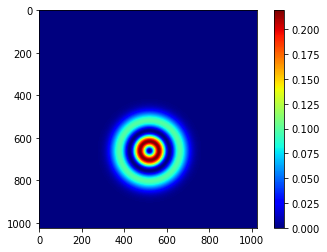

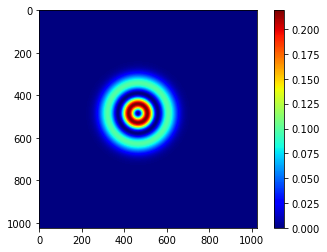

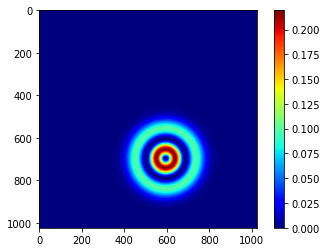

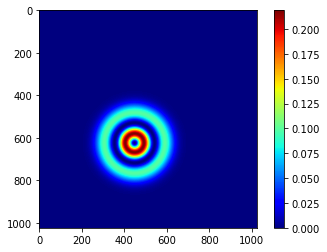

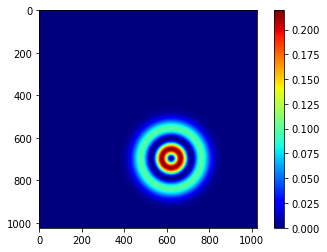

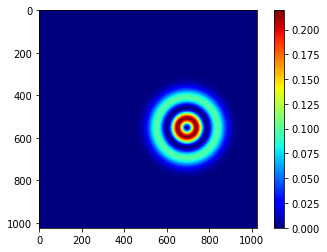

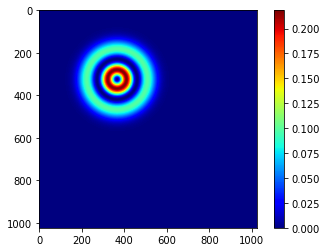

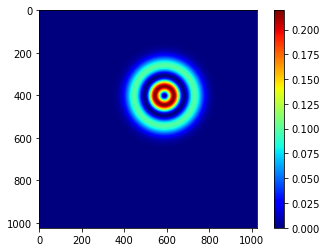

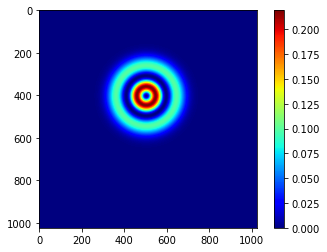

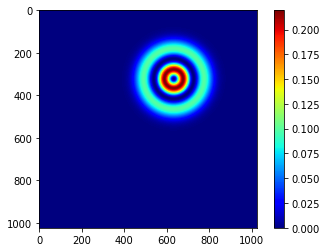

In [ ]:
########################################################################
P = 1 
L = 1
n = 2**10 + 1
lamb = 512*nm        
k    = 2*np.pi/lamb        
w_0  = 1.6*mm          
z_R  = np.pi*w_0**2/lamb 
dx   = 17*um 
########################################################################
dzPar = np.arange(1e-20,100,1)*cm  
z     = dzPar[0]  
########################################################################

N_inc = 10
i     = 0
SI    = [0]

while (i<N_inc):
  i+=1
########################################################################## 
# Essa parte é responsavel por criar o deslocamento dos campo 
  x00 = random.randint(-200,200)*dx
  y00 = random.randint(-200,200)*dx
  
  x1  = np.arange(-n/2+1, n/2,1)*dx
  x   = x1-x00
  y1  = np.arange(-n/2+1, n/2,1)*dx
  y   = y1-y00

  xx,yy = np.meshgrid(x,y)
##########################################################################
# Nessa parte Criamos o campo 
  r    = np.sqrt( xx**2 + yy**2)                                              # Variavel Raio
  C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))  # Constante de Normalização
  w    = w_0*np.sqrt(1+(z/z_R)**2)                                            # Raio da cintura do feixe em z 
  R    = z*(1+(z_R/z)**2)                                                     #Raio de curvatura 
  phi  = (1+2*P+abs(L))*np.arctan(z/z_R)                                      # Fase de gouy
  PL   = scipy.special.assoc_laguerre(2*r**2/w**2,P,abs(L))                   #Primeira entrada é a variavel"x", Segunda-> graul;Terceira-> Ordem
  Fase = np.exp(-r**2/w**2 - 1j*k*r**2/(2*R) + 1j*phi - 1j*L*np.arctan2(yy,xx))*np.exp(-1j*k*z)

  LG   = C*w_0/w*(r*np.sqrt(2)/w)**abs(L)*PL*Fase
########################################################################
# Vamos fazer esse campo passar pela F.D.
  LGint = LG
  
  F    = Begin(2*abs(x[1]),lamb,n) # Criando um Campo no lightpipes
  Fint = F.copy(F)
  Fint.field = LGint
  
  propagação = Forvard(60*cm,Fint) # VALORES MENOS QUE 3 E MAIOR QUE 6 TEM MUITO RUIDO 
  imag       = Intensity(0,propagação) 
  
  plt.imshow(imag,cmap='jet'); 
  plt.colorbar()
  plt.show()  

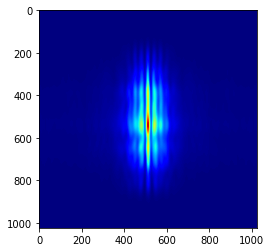

In [ ]:
########################################################################
P = 1 
L = 1
n = 2**10 + 1
lamb = 512*nm        
k    = 2*np.pi/lamb        
w_0  = 1.6*mm          
z_R  = np.pi*w_0**2/lamb 
dx   = 17*um 
########################################################################
dzPar = np.arange(1e-20,100,1)*cm  
z     = dzPar[0]  
########################################################################

N_inc = 100
i     = 0
SI    = [0]

while (i<N_inc):
  i+=1
########################################################################## 
# Essa parte é responsavel por criar o deslocamento dos campo 
  x00 = random.randint(-200,200)*dx
  y00 = random.randint(-200,200)*dx
  
  x1  = np.arange(-n/2+1, n/2,1)*dx
  x   = x1-x00
  y1  = np.arange(-n/2+1, n/2,1)*dx
  y   = y1-y00

  xx,yy = np.meshgrid(x,y)
##########################################################################
# Nessa parte Criamos o campo 
  r    = np.sqrt( xx**2 + yy**2)                                              # Variavel Raio
  C    = np.sqrt(2*np.math.factorial(P)/(np.pi*np.math.factorial(P+abs(L))))  # Constante de Normalização
  w    = w_0*np.sqrt(1+(z/z_R)**2)                                            # Raio da cintura do feixe em z 
  R    = z*(1+(z_R/z)**2)                                                     #Raio de curvatura 
  phi  = (1+2*P+abs(L))*np.arctan(z/z_R)                                      # Fase de gouy
  PL   = scipy.special.assoc_laguerre(2*r**2/w**2,P,abs(L))                   #Primeira entrada é a variavel"x", Segunda-> graul;Terceira-> Ordem
  Fase = np.exp(-r**2/w**2 - 1j*k*r**2/(2*R) + 1j*phi - 1j*L*np.arctan2(yy,xx))*np.exp(-1j*k*z)

  LG   = C*w_0/w*(r*np.sqrt(2)/w)**abs(L)*PL*Fase
########################################################################
# Vamos fazer esse campo passar pela F.D.
  LGint = LG*ri
  
  F    = Begin(2*abs(x[1]),lamb,n) # Criando um Campo no lightpipes
  Fint = F.copy(F)
  Fint.field = LGint
  
  propagação = Forvard(60*cm,Fint) # VALORES MENOS QUE 3 E MAIOR QUE 6 TEM MUITO RUIDO 
  imag       = Intensity(0,propagação) 
  
  #plt.imshow(imag,cmap='jet'); 
  #plt.colorbar()
  #plt.show()
  SI = SI + imag               # Somando todas as interferência   

imagem = SI/N_inc 
plt.imshow(imagem,cmap='jet')
plt.show()  


In [ ]:
# Ajustado para analisar na Direita e esquerda
### Função da Suavização #########################
def SUAVE(media, linha):
  novalista = []
  for i in range(media ,1024,1):
    b = imagem[linha,i-media:i]
    AA = sum(b)/media
    novalista.append(AA)
  return np.array(novalista)

def MM(suavizar,linha):
  maxi2 = SUAVE(suavizar,linha).max()
  posiçao2 = 0
  for i in SUAVE(suavizar,linha):
    if i == maxi2:
      break 
    posiçao2 +=1 

#### Encontrar o valor mínimo local a Direita parti do maximo global
  mini = 0
  Vimax = SUAVE(suavizar,linha)[posiçao2:1024]
  for i in range(len(Vimax)):
    if i == len(Vimax)-1:
      break
    if Vimax[i] > Vimax[i+1]:
      mini = Vimax[i+1]
    elif Vimax[i] < Vimax[i+1]:
      mini = Vimax[i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMin = 0 
  for i in Vimax:
    if i == mini:
      break 
    PMin += 1  
  posiçaomin = posiçao2 + PMin -1
#######################################################################
#### Encontrar o valor mínimo local a ESQUERDA a parti do maximo lobal
  miniE = 0
  xamiV = SUAVE(suavizar,linha)[0:posiçao2]
#########################################################
  for i in range(len(xamiV)):
    i += 1
    if i == len(xamiV)-1:
      break
    if xamiV[-i] > xamiV[-i-1]:
      miniE = xamiV[-i-1]
    elif xamiV[-i] < xamiV[-i-1]:
      miniE = xamiV[-i]
      break   
  # Vamos encontrar o posição no qual temos mínimo
  PMinE = 0 
  for i in range(len(xamiV)):
    i+=1
    if xamiV[-i] == miniE: 
      break 
    PMinE += 1  
  posiçaominE = posiçao2 - PMinE

  if miniE > mini:
    posiçaomin = posiçaominE
    mini       = miniE
  # [0] = Valor max,[1] = Posição max ,[2] = Valor Min,[3] = Posição Min
  return maxi2, posiçao2, mini, posiçaomin  #,miniE, posiçaominE 

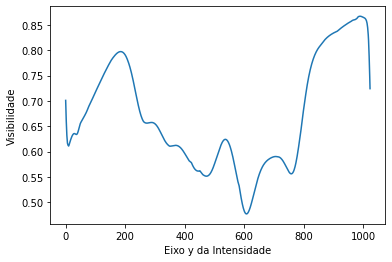

In [ ]:
# A VISIBILIDADE TODA
VisibilidadeN = []

for j in range(0,1024):
  V = ( MM(3,j)[0]  - MM(3,j)[2] )/( MM(3,j)[0]  + MM(3,j)[2])
  VisibilidadeN.append(V) 
  
plt.plot(VisibilidadeN) 
plt.xlabel('Eixo y da Intensidade')
plt.ylabel("Visibilidade")
plt.show()


(0.007349453032089526, 511, 0.0018169350360266235, 497)


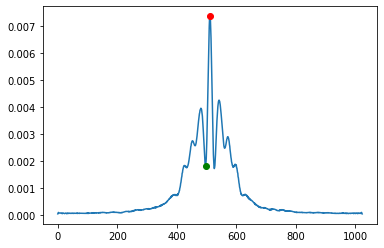

Visibilidade = 0.6035657616664631


In [ ]:
qe =2
qw = 512
print(MM(qe,qw))
# DISTRIBUIÇÃO DE INTENSIDADE
plt.plot(imagem[qw])
plt.plot(MM(qe,qw)[1] , MM(qe,qw)[0] , 'o', color ='red'  )
plt.plot(MM(qe,qw)[3] , MM(qe,qw)[2] , 'o', color ='green'  )
plt.show()
# VISIBILIDADE
V = ( MM(qe,qw)[0]  - MM(qe,qw)[2] )/( MM(qe,qw)[0]  + MM(qe,qw)[2])
print("Visibilidade =",V)